## Introduction:
Welcome to the Social Buzz Analysis Case Study! In this case study, I will be performing several real world tasks.

## Client background:
Social Buzz was founded by two former engineers from a large social media conglomerate, one from London and the other from San Francisco. They left in 2008 and both met in San Francisco to start their business. They started Social Buzz because they saw an opportunity to build on the foundation that their previous company started by creating a new platform where content took center stage. Social Buzz emphasizes content by keeping all users anonymous, only tracking user reactions on every piece of content. There are over 100 ways that users can react to content, spanning beyond the traditional reactions of likes, dislikes, and comments.
This ensures that trending content, as opposed to individual users, is at the forefront of user feeds.
Over the past 5 years, Social Buzz has reached over 500 million active users each month.
They have scaled quicker than anticipated and need the help of an advisory firm to oversee their scaling process effectively.
Due to their rapid growth and digital nature of their core product, the amount of data that they create, collect and must analyze is huge. Every day over 100,000 pieces of content, ranging from text, images, videos and GIFs are posted. All of this data is highly unstructured and requires extremely sophisticated and expensive technology to manage and maintain. Out of the 250 people working at Social Buzz, 200 of them are technical staff working on maintaining this highly complex technology.
Up until this point, they have not relied on any third party firms to help them get to where they are

## Tasks in this analysis:
An analysis of their content categories that highlights the top 5 categories with the
largest aggregate popularit.


In [2]:
#import the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#reading the data

df = pd.read_csv('D:/ahmad_1/data/accenture datasets/data sets/Task 3_Final Content Data set.csv')

df.head()

Unnamed: 0                            Content ID Reaction Type  \
0           0  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
1           1  97522e57-d9ab-4bd6-97bf-c24d952602d2       dislike   
2           2  97522e57-d9ab-4bd6-97bf-c24d952602d2        scared   
3           3  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
4           4  97522e57-d9ab-4bd6-97bf-c24d952602d2    interested   

        Datetime Content Type  Category Sentiment  Score  
0   7/11/20 9:43        photo  studying  negative      0  
1  17/6/21 12:22        photo  studying  negative     10  
2   18/4/21 5:13        photo  studying  negative     15  
3   6/1/21 19:13        photo  studying  negative      0  
4  23/8/20 12:25        photo  studying  positive     30

In [4]:
# getting the basic information about the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     24573 non-null  int64 
 1   Content ID     24573 non-null  object
 2   Reaction Type  24573 non-null  object
 3   Datetime       24573 non-null  object
 4   Content Type   24573 non-null  object
 5   Category       24573 non-null  object
 6   Sentiment      24573 non-null  object
 7   Score          24573 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.5+ MB


In [9]:
df.shape

(24573, 8)

# Cleaning The Data:

In [4]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

Content ID Reaction Type       Datetime  \
0  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   7/11/20 9:43   
1  97522e57-d9ab-4bd6-97bf-c24d952602d2       dislike  17/6/21 12:22   
2  97522e57-d9ab-4bd6-97bf-c24d952602d2        scared   18/4/21 5:13   
3  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   6/1/21 19:13   
4  97522e57-d9ab-4bd6-97bf-c24d952602d2    interested  23/8/20 12:25   

  Content Type  Category Sentiment  Score  
0        photo  studying  negative      0  
1        photo  studying  negative     10  
2        photo  studying  negative     15  
3        photo  studying  negative      0  
4        photo  studying  positive     30

In [6]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.head()

Content ID Reaction Type            Datetime  \
0  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust 2020-07-11 09:43:00   
1  97522e57-d9ab-4bd6-97bf-c24d952602d2       dislike 2021-06-17 12:22:00   
2  97522e57-d9ab-4bd6-97bf-c24d952602d2        scared 2021-04-18 05:13:00   
3  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust 2021-06-01 19:13:00   
4  97522e57-d9ab-4bd6-97bf-c24d952602d2    interested 2020-08-23 12:25:00   

  Content Type  Category Sentiment  Score  
0        photo  studying  negative      0  
1        photo  studying  negative     10  
2        photo  studying  negative     15  
3        photo  studying  negative      0  
4        photo  studying  positive     30

In [7]:
df['Month'] = df['Datetime'].dt.month
df['Year'] = df['Datetime'].dt.year

# EDA :

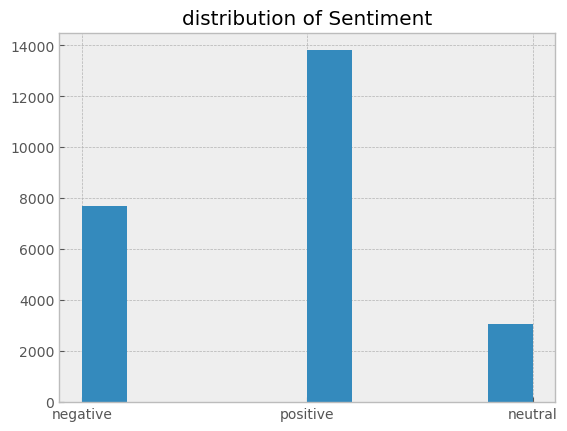

In [154]:

plt.hist(df['Sentiment'])
plt.title('distribution of Sentiment')
plt.show()

In [16]:
positive = df[df['Sentiment']=='positive']['Reaction Type']
negative = df[df['Sentiment']=='negative']['Reaction Type']
neutral = df[df['Sentiment']=='neutral']['Reaction Type']

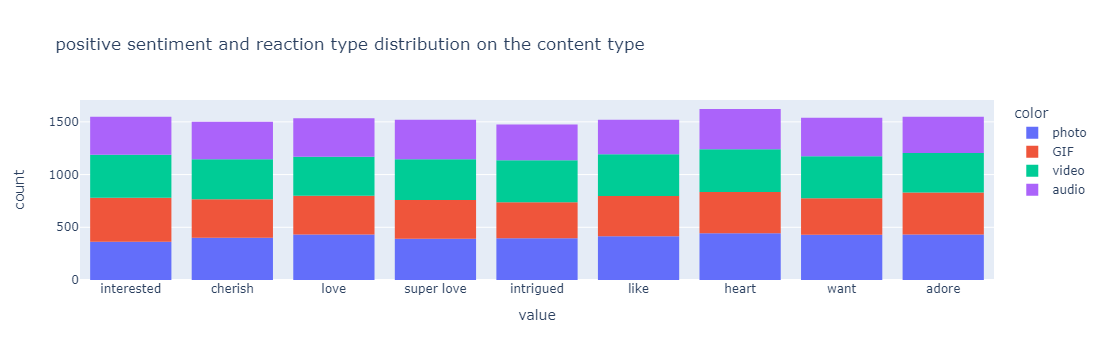

In [114]:
px.histogram(positive, color=df[df['Sentiment']=='positive']['Content Type'],
             title='positive sentiment and reaction type distribution on the content type')

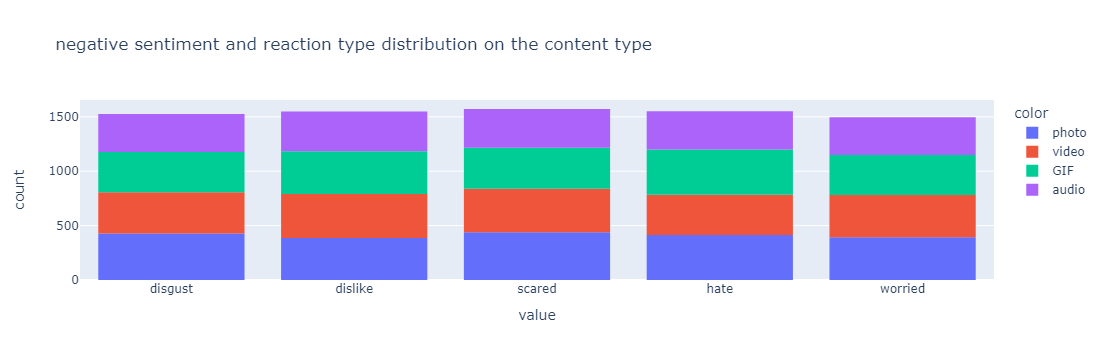

In [115]:
px.histogram(negative, color=df[df['Sentiment']=='negative']['Content Type'],
             title='negative sentiment and reaction type distribution on the content type')

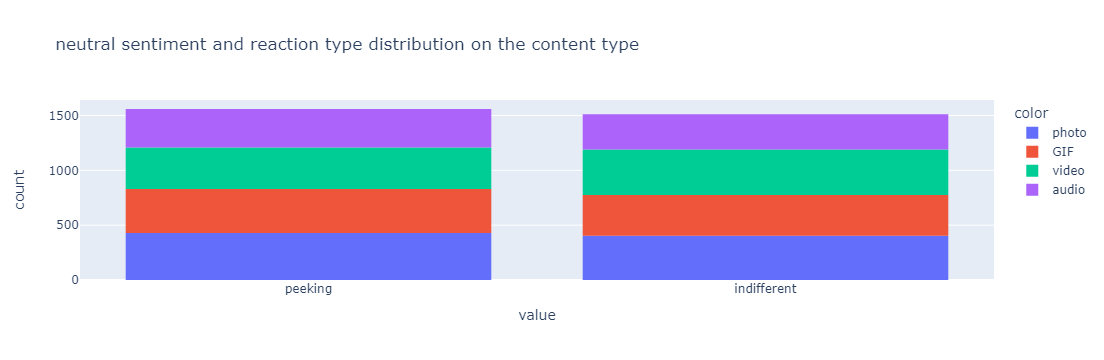

In [116]:
px.histogram(neutral, color=df[df['Sentiment']=='neutral']['Content Type'],
             title='neutral sentiment and reaction type distribution on the content type')

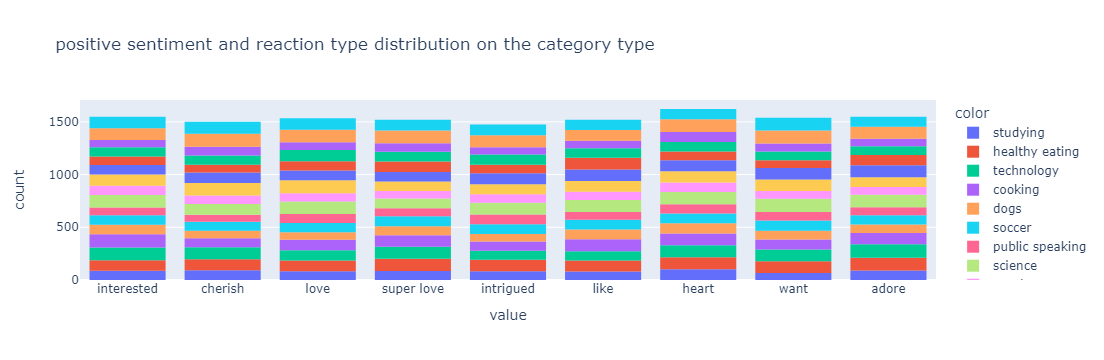

In [117]:
px.histogram(positive, color=df[df['Sentiment']=='positive']['Category']
             , title='positive sentiment and reaction type distribution on the category type')

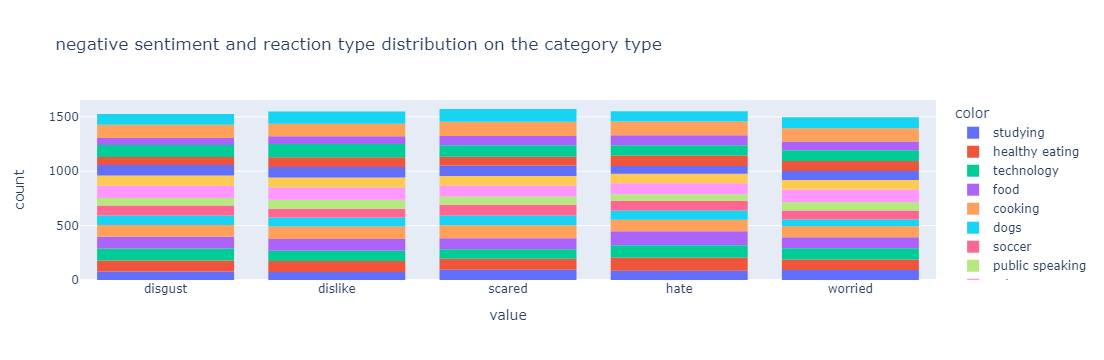

In [155]:
px.histogram(negative, color=df[df['Sentiment']=='negative']['Category']
             , title='negative sentiment and reaction type distribution on the category type')


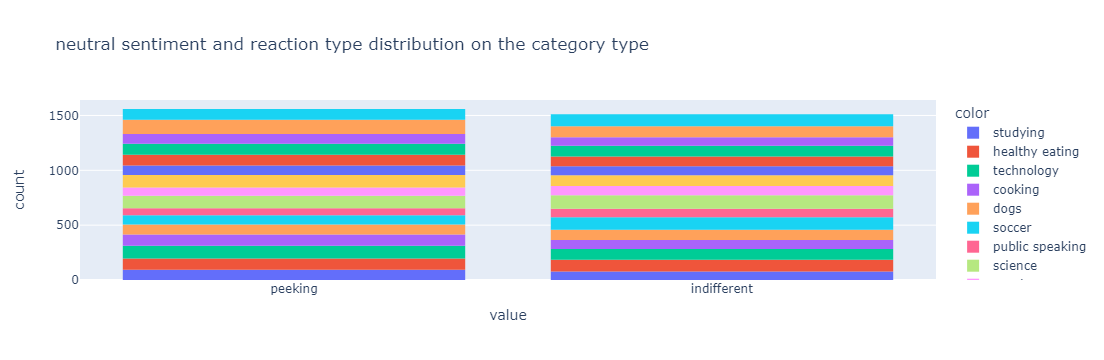

In [156]:
px.histogram(neutral, color=df[df['Sentiment']=='neutral']['Category'],
            title='neutral sentiment and reaction type distribution on the category type')


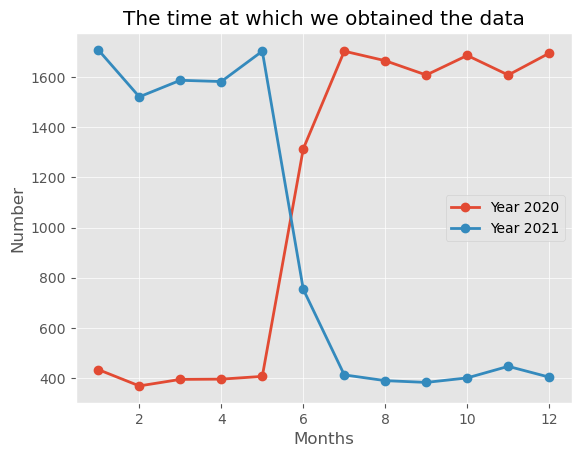

In [26]:
plt.style.use('ggplot')
plt.plot(list(set(df.groupby(['Year','Month'],as_index=False).count()['Month'].values)),
         df[df['Year']==2020].groupby(['Year','Month'],as_index=False).count()['Score'],
        label='Year 2020', marker='o')
plt.plot(list(set(df.groupby(['Year','Month'],as_index=False).count()['Month'].values)),
         df[df['Year']==2021].groupby(['Year','Month'],as_index=False).count()['Score'],
        label='Year 2021', marker='o')
plt.title('The time at which we obtained the data')
plt.ylabel('Number')
plt.xlabel('Months')
plt.legend()
plt.show()

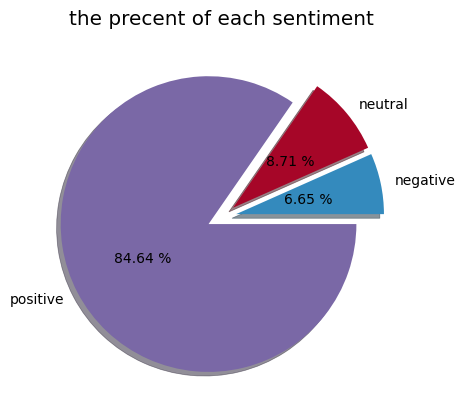

In [72]:
labels = df.groupby('Sentiment')['Score'].sum().reset_index()['Sentiment'].values
score_sent = df.groupby('Sentiment')['Score'].sum().reset_index()['Score']

plt.style.use('bmh')


plt.pie(x = score_sent,
        explode=[.1,.1,.1], labels=labels, autopct='%.2f %%', shadow=True, pctdistance=.5 )
plt.title('the percent of each sentiment')



plt.show()

### grouping the data to see how each group affect the other

In [27]:

group_3 = df.groupby(['Reaction Type', 'Month', 'Year'])['Score'].sum().reset_index()
group_3.head()

Reaction Type  Month  Year  Score
0         adore      1  2020   1656
1         adore      1  2021   8424
2         adore      2  2020   1656
3         adore      2  2021   6840
4         adore      3  2020   1656

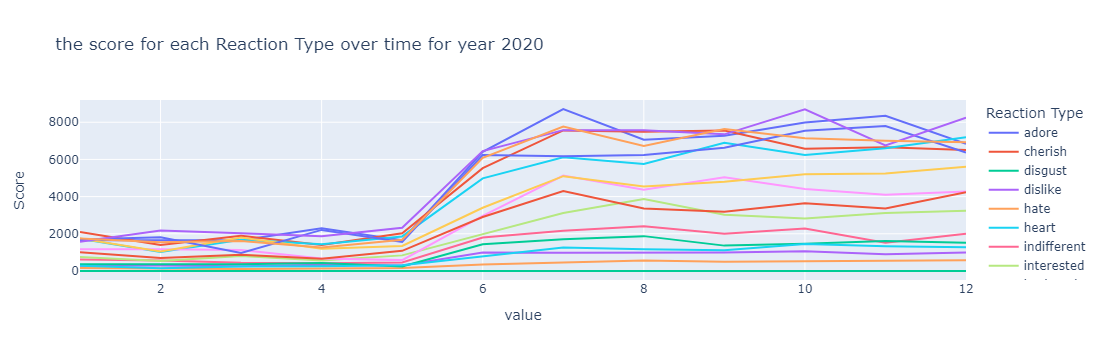

In [83]:
px.line(data_frame=group_3[group_3['Year']==2020], x=['Month'], y='Score', color='Reaction Type'
        ,title=' the score for each Reaction Type over time for year 2020')

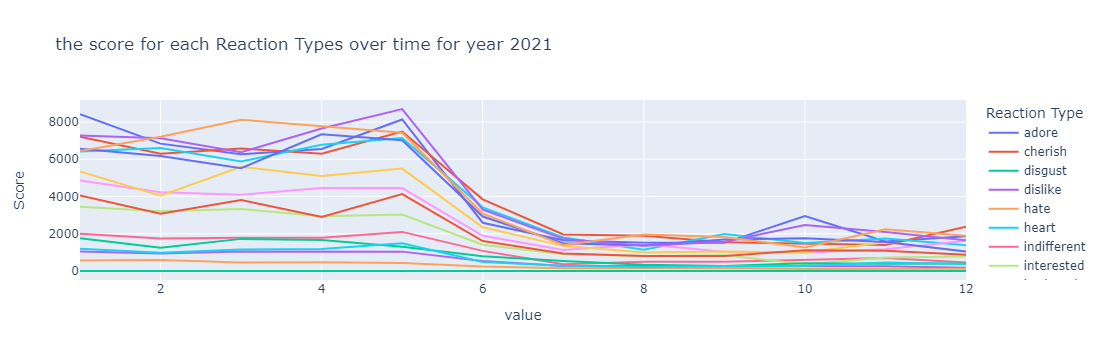

In [82]:
px.line(data_frame=group_3[group_3['Year']==2021], x=['Month'], y='Score', color='Reaction Type'
        ,title=' the score for each Reaction Type over time for year 2021')


In [38]:
group_4 = df.groupby(['Sentiment', 'Month', 'Year'])['Score'].sum().reset_index()

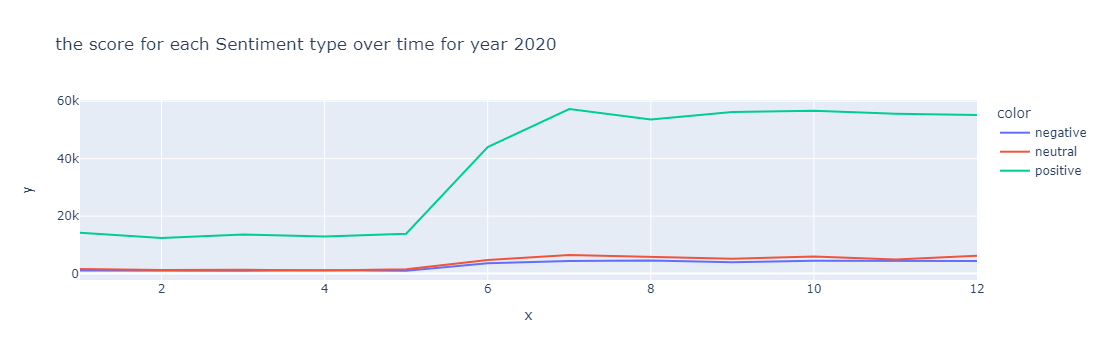

In [81]:
px.line(x=group_4[group_4['Year']==2020]['Month'], y=group_4[group_4['Year']==2020]['Score']
        ,color=group_4[group_4['Year']==2020]['Sentiment'], title='the score for each Sentiment type over time for year 2020')

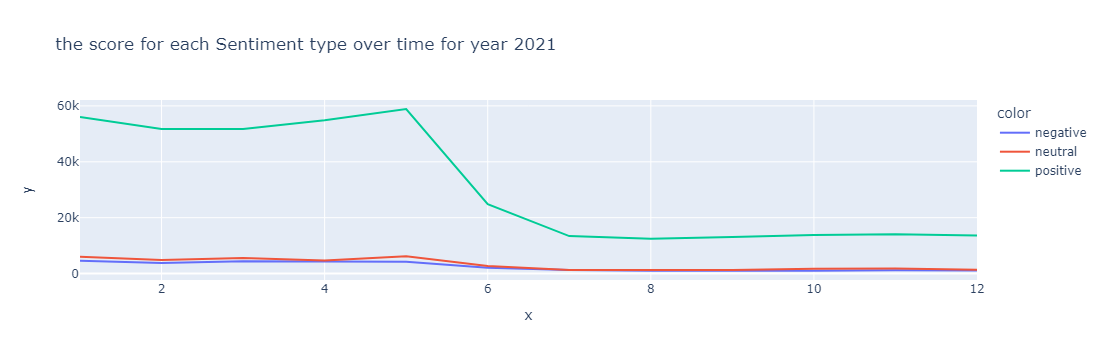

In [80]:
px.line(x=group_4[group_4['Year']==2021]['Month'], y=group_4[group_4['Year']==2021]['Score']
        ,color=group_4[group_4['Year']==2021]['Sentiment'],title='the score for each Sentiment type over time for year 2021')

In [160]:
tabel = pd.DataFrame()

In [161]:
# checking if the rise in data is just on one type of Sentiment
# taking the ratio of each type of Sentiment and look of significant rise ... 

year=2020

for i in range(1,13):
    sum_of_scores = sum(group_4[(group_4['Year']==year) & (group_4['Month']==i)]['Score'].values)
    neg, neu, pos = group_4[(group_4['Year']==year) & (group_4['Month']==i)]['Score'].values
    pos_ratio = pos/sum_of_scores
    neg_ratio = neg/sum_of_scores
    neu_ratio = neu/sum_of_scores
    print ( f'the sum of scores in the  {i} month is: ',
          sum_of_scores)
    neg, neu, pos = group_4[(group_4['Year']==year) & (group_4['Month']==i)]['Score'].values
    print('the ratio of negative, nuetral, positive is:', neg_ratio, neu_ratio, pos_ratio )
    tabel = pd.concat([tabel ,pd.DataFrame([{'month':i, 'year':year, 'negative_score':neg, 'nuetral_score':neu, 
                        'positive':pos, 'sum_of_scores':sum_of_scores, 'pos_ratio':pos_ratio,
                        'neg_ratio':neg_ratio,'neu_ratio':neu_ratio}])], ignore_index=True)



year=2021

for i in range(1,13):
    sum_of_scores = sum(group_4[(group_4['Year']==year) & (group_4['Month']==i)]['Score'].values)
    neg, neu, pos = group_4[(group_4['Year']==year) & (group_4['Month']==i)]['Score'].values
    pos_ratio = pos/sum_of_scores
    neg_ratio = neg/sum_of_scores
    neu_ratio = neu/sum_of_scores
    print ( f'the sum of scores in the  {i} month is: ',
          sum_of_scores)
    neg, neu, pos = group_4[(group_4['Year']==year) & (group_4['Month']==i)]['Score'].values
    print('the ratio of negative, nuetral, positive is:', neg_ratio, neu_ratio, pos_ratio )
    tabel = pd.concat([tabel ,pd.DataFrame([{'month':i, 'year':year, 'negative_score':neg, 'nuetral_score':neu, 
                        'positive':pos, 'sum_of_scores':sum_of_scores, 'pos_ratio':pos_ratio,
                        'neg_ratio':neg_ratio,'neu_ratio':neu_ratio}])], ignore_index=True)

the sum of scores in the  1 month is:  16887
the ratio of negative, nuetral, positive is: 0.06342156688577012 0.09682003908331853 0.8397583940309113
the sum of scores in the  2 month is:  14535
the ratio of negative, nuetral, positive is: 0.06219470244238046 0.08668730650154799 0.8511179910560716
the sum of scores in the  3 month is:  15841
the ratio of negative, nuetral, positive is: 0.06028659806830377 0.08301243608358058 0.8567009658481156
the sum of scores in the  4 month is:  15171
the ratio of negative, nuetral, positive is: 0.0759343484279217 0.07151802781622833 0.85254762375585
the sum of scores in the  5 month is:  16428
the ratio of negative, nuetral, positive is: 0.0606890674458242 0.09404674945215485 0.8452641831020209
the sum of scores in the  6 month is:  52352
the ratio of negative, nuetral, positive is: 0.06874617970660146 0.089872402200489 0.8413814180929096
the sum of scores in the  7 month is:  68127
the ratio of negative, nuetral, positive is: 0.06458525988227869 0.

In [162]:
# there is no significant rise

tabel

month  year  negative_score  nuetral_score  positive  sum_of_scores  \
0       1  2020            1071           1635     14181          16887   
1       2  2020             904           1260     12371          14535   
2       3  2020             955           1315     13571          15841   
3       4  2020            1152           1085     12934          15171   
4       5  2020             997           1545     13886          16428   
5       6  2020            3599           4705     44048          52352   
6       7  2020            4400           6465     57262          68127   
7       8  2020            4589           5760     53626          63975   
8       9  2020            3971           5185     56212          65368   
9      10  2020            4512           5920     56622          67054   
10     11  2020            4387           4880     55617          64884   
11     12  2020            4357           6235     55215          65807   
12      1  2021            4570           6060     55994          66624   
13      2  2021            3764           4820     51740          60324   
14      3  2021            4382           5595     51769          61746   
15      4  2021            4356           4685     54892          63933   
16      5  2021            4268           6230     58891          69389   
17      6  2021            2050           2690     24817          29557   
18      7  2021            1248           1305     13411          15964   
19      8  2021             981           1305     12467          14753   
20      9  2021             919           1305     13042          15266   
21     10  2021            1049           1700     13762          16511   
22     11  2021            1221           1785     14064          17070   
23     12  2021            1082           1335     13662          16079   

    pos_ratio  neg_ratio  neu_ratio  
0    0.839758   0.063422   0.096820  
1    0.851118   0.062195   0.086687  
2    0.856701   0.060287   0.083012  
3    0.852548   0.075934   0.071518  
4    0.845264   0.060689   0.094047  
5    0.841381   0.068746   0.089872  
6    0.840518   0.064585   0.094896  
7    0.838234   0.071731   0.090035  
8    0.859931   0.060748   0.079320  
9    0.844424   0.067289   0.088287  
10   0.857176   0.067613   0.075211  
11   0.839044   0.066209   0.094747  
12   0.840448   0.068594   0.090958  
13   0.857702   0.062396   0.079902  
14   0.838419   0.070968   0.090613  
15   0.858586   0.068134   0.073280  
16   0.848708   0.061508   0.089784  
17   0.839632   0.069358   0.091011  
18   0.840078   0.078176   0.081746  
19   0.845048   0.066495   0.088457  
20   0.854317   0.060199   0.085484  
21   0.833505   0.063533   0.102962  
22   0.823902   0.071529   0.104569  
23   0.849680   0.067293   0.083028

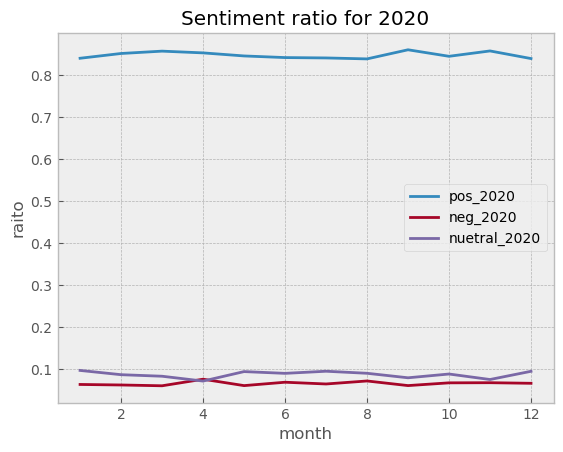

In [211]:
# to visualize it: 
plt.plot(tabel[tabel['year']==2020]['month'], tabel[tabel['year']==2020]['pos_ratio'], label='pos_2020')
plt.plot(tabel[tabel['year']==2020]['month'], tabel[tabel['year']==2020]['neg_ratio'], label='neg_2020')
plt.plot(tabel[tabel['year']==2020]['month'], tabel[tabel['year']==2020]['neu_ratio'], label='nuetral_2020')
plt.title('Sentiment ratio for 2020')
plt.ylabel('raito')
plt.xlabel('month')
plt.legend()

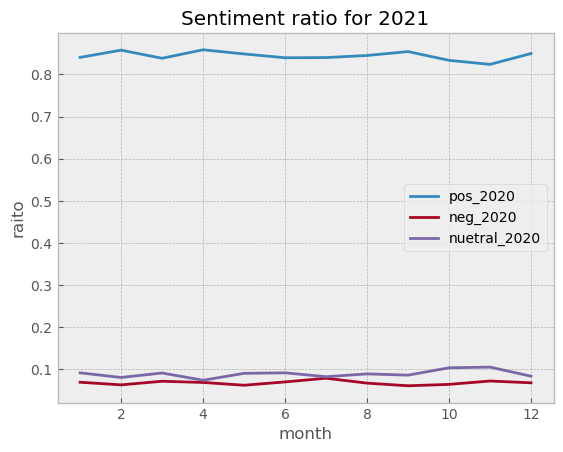

In [210]:
plt.plot(tabel[tabel['year']==2021]['month'], tabel[tabel['year']==2021]['pos_ratio'], label='pos_2020')
plt.plot(tabel[tabel['year']==2021]['month'], tabel[tabel['year']==2021]['neg_ratio'], label='neg_2020')
plt.plot(tabel[tabel['year']==2021]['month'], tabel[tabel['year']==2021]['neu_ratio'], label='nuetral_2020')
plt.title('Sentiment ratio for 2021')
plt.ylabel('raito')
plt.xlabel('month')
plt.legend()

In [58]:
group_5 = df.groupby(['Month','Category']).agg({'Score':'sum'}).reset_index()
group_5

Month    Category  Score
0        1     animals   6499
1        1     cooking   5107
2        1     culture   6076
3        1        dogs   4975
4        1   education   4522
..     ...         ...    ...
187     12    studying   4296
188     12  technology   4524
189     12      tennis   4314
190     12      travel   5721
191     12    veganism   4374

[192 rows x 3 columns]

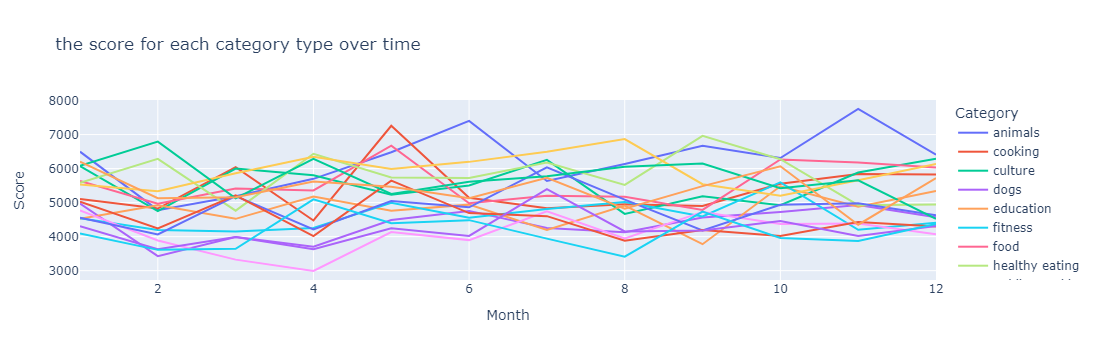

In [79]:
fig = px.line(data_frame=group_5, x='Month', y='Score', color='Category', title=' the score for each category type over time')
fig.show()

In [51]:
group_6 = df.groupby(['Content Type','Month'])['Score'].sum().reset_index()
group_6.head()

Content Type  Month  Score
0          GIF      1  19804
1          GIF      2  18846
2          GIF      3  20555
3          GIF      4  19490
4          GIF      5  21262

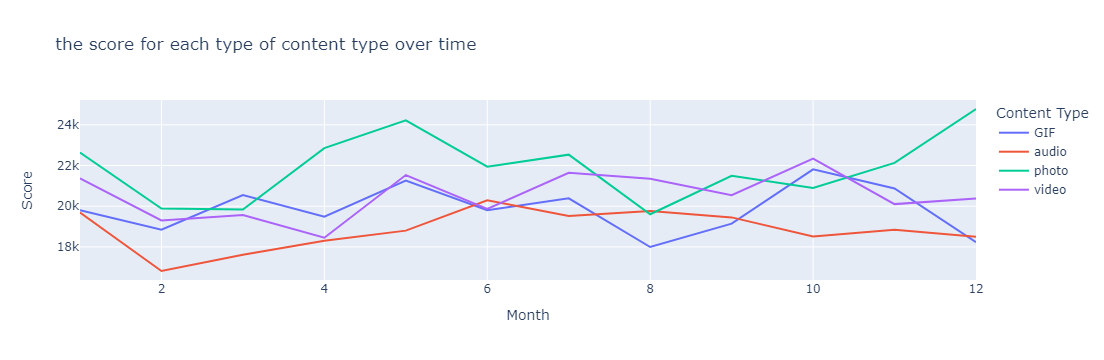

In [54]:
px.line(data_frame=group_6, x='Month', y='Score', color='Content Type',
        title='the score for each type of content type over time' )

In [53]:
group_7 = df.groupby(['Content Type', 'Month']).count().reset_index()
group_7.head()

Content Type  Month  Content ID  Reaction Type  Datetime  Category  \
0          GIF      1         523            523       523       523   
1          GIF      2         488            488       488       488   
2          GIF      3         530            530       530       530   
3          GIF      4         476            476       476       476   
4          GIF      5         540            540       540       540   

   Sentiment  Score  Year  
0        523    523   523  
1        488    488   488  
2        530    530   530  
3        476    476   476  
4        540    540   540

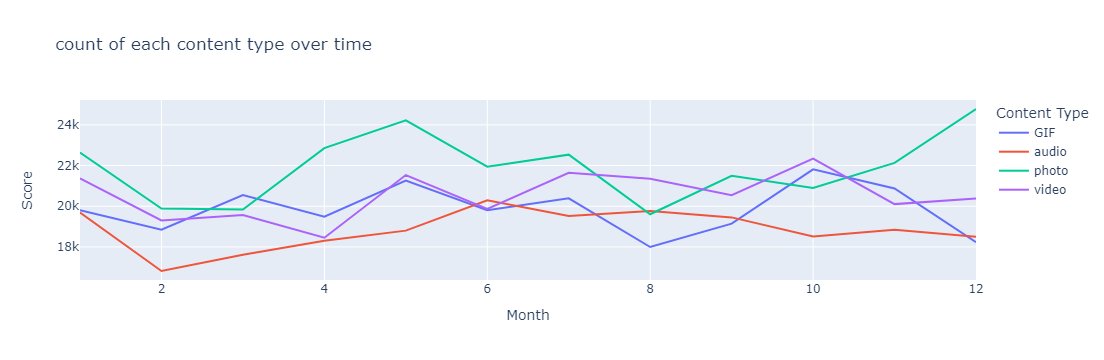

In [83]:
px.line(data_frame=group_6, x='Month', y='Score', color='Content Type', title='count of each content type over time')

In [8]:
group_8 = df.groupby(['Reaction Type', 'Sentiment'])['Score'].sum().reset_index()

In [9]:
group_8.head()

Reaction Type Sentiment   Score
0         adore  positive  111456
1       cherish  positive  105070
2       disgust  negative       0
3       dislike  negative   15480
4          hate  negative    7760

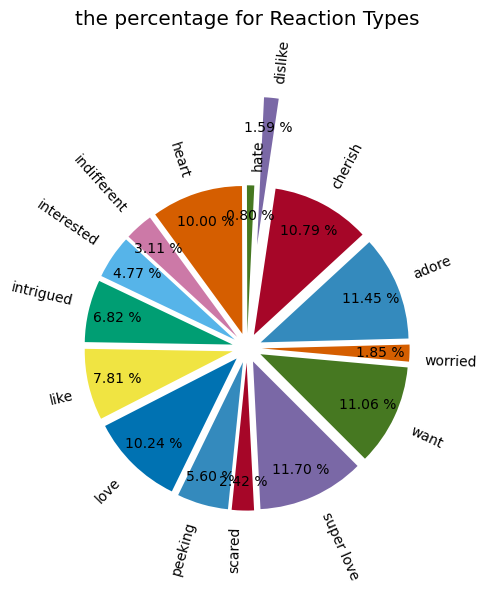

In [40]:
# kinda hard too see the percentage :)
# explode = [.1,.1,.7,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,]
# plt.pie(x=group_8[group_8['Reaction Type']!='disgust']['Score'], 
#         labels=group_8[group_8['Reaction Type']!='disgust']['Reaction Type'], explode=explode,
#        autopct='%.2f %%', radius=1, rotatelabels=True, pctdistance=.8, startangle=1.5 )
# plt.title('the percentage for Reaction Types', pad =100)
# plt.show()

In [113]:
# the reactionn type (disgust) score is 0, so i droped it
group_8 = group_8[group_8['Score']!=0]
group_8

Reaction Type Sentiment   Score
0          adore  positive  111456
1        cherish  positive  105070
3        dislike  negative   15480
4           hate  negative    7760
5          heart  positive   97320
6    indifferent   neutral   30240
7     interested  positive   46470
8      intrigued  positive   66375
9           like  positive   76000
10          love  positive   99710
11       peeking   neutral   54565
12        scared  negative   23580
13    super love  positive  113925
14          want  positive  107730
15       worried  negative   17964

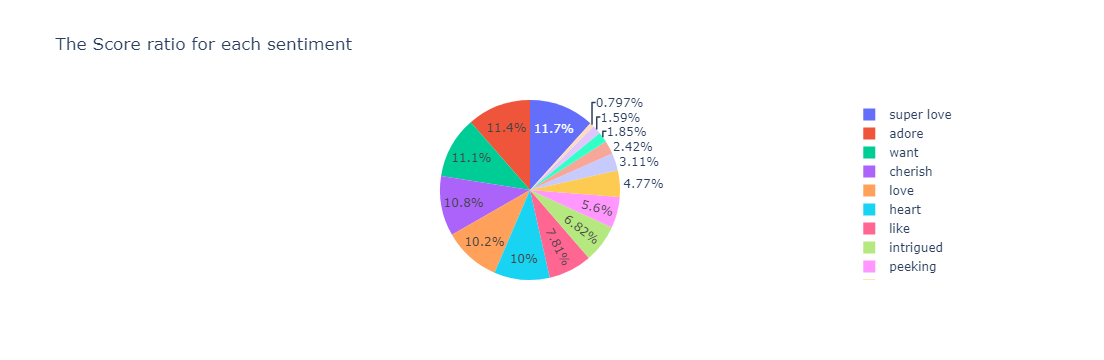

In [118]:
px.pie(names=group_8['Reaction Type'],values=group_8['Score']
       , title='The Score ratio for each sentiment')

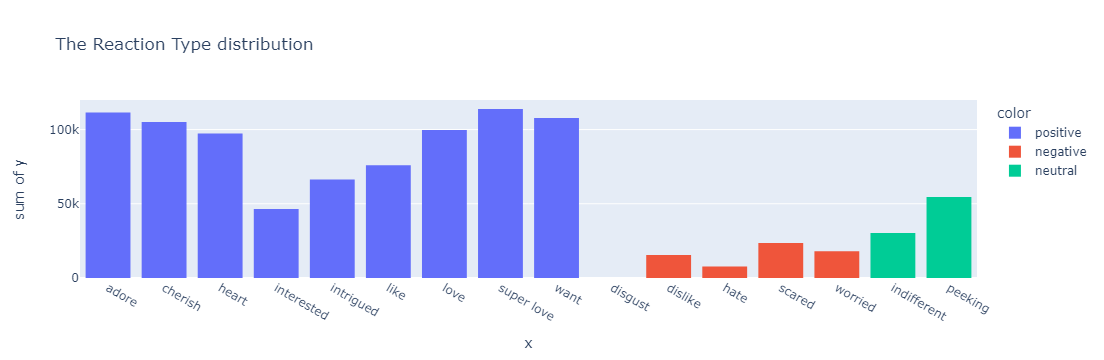

In [10]:
px.histogram(x=group_8['Reaction Type'], y=group_8['Score'],color=group_8['Sentiment'], 
            title='The Reaction Type distribution ')

# The analysis task..

In [109]:
# name a new variable to the same data frame so we don't ruin the original one that We worked on it for a long time ..
df_1 = pd.read_csv('D:/ahmad_1/data/accenture datasets/data sets/Task 3_Final Content Data set.csv')
df_1.drop(columns = 'Unnamed: 0', inplace=True)
df_1.head()

Content ID Reaction Type       Datetime  \
0  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   7/11/20 9:43   
1  97522e57-d9ab-4bd6-97bf-c24d952602d2       dislike  17/6/21 12:22   
2  97522e57-d9ab-4bd6-97bf-c24d952602d2        scared   18/4/21 5:13   
3  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   6/1/21 19:13   
4  97522e57-d9ab-4bd6-97bf-c24d952602d2    interested  23/8/20 12:25   

  Content Type  Category Sentiment  Score  
0        photo  studying  negative      0  
1        photo  studying  negative     10  
2        photo  studying  negative     15  
3        photo  studying  negative      0  
4        photo  studying  positive     30

In [110]:
# teking just the year and month fron the datetime column as a text (str)
df_1['date'] = df_1['Datetime'].apply(lambda x: x.split(' ')[0])
df_1['date'] = pd.to_datetime(df_1['date'])
df_1.head()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_21928\3740286729.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Content ID Reaction Type       Datetime  \
0  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   7/11/20 9:43   
1  97522e57-d9ab-4bd6-97bf-c24d952602d2       dislike  17/6/21 12:22   
2  97522e57-d9ab-4bd6-97bf-c24d952602d2        scared   18/4/21 5:13   
3  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   6/1/21 19:13   
4  97522e57-d9ab-4bd6-97bf-c24d952602d2    interested  23/8/20 12:25   

  Content Type  Category Sentiment  Score       date  
0        photo  studying  negative      0 2020-07-11  
1        photo  studying  negative     10 2021-06-17  
2        photo  studying  negative     15 2021-04-18  
3        photo  studying  negative      0 2021-06-01  
4        photo  studying  positive     30 2020-08-23

In [115]:
# setting all the days as the first day of the month so we can just look at the month instead of the days.
# I did that becuase if i took the month with the (dt.month) method the line chart could not plot it as the x axis
# due to the datatype.

from pandas.tseries.offsets import DateOffset
df_1['date'] = df_1['date'] + DateOffset(day=1)
df_1.head()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_21928\3507539516.py:2: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.



Content ID Reaction Type       Datetime  \
0  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   7/11/20 9:43   
1  97522e57-d9ab-4bd6-97bf-c24d952602d2       dislike  17/6/21 12:22   
2  97522e57-d9ab-4bd6-97bf-c24d952602d2        scared   18/4/21 5:13   
3  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   6/1/21 19:13   
4  97522e57-d9ab-4bd6-97bf-c24d952602d2    interested  23/8/20 12:25   

  Content Type  Category Sentiment  Score       date  
0        photo  studying  negative      0 2020-07-01  
1        photo  studying  negative     10 2021-06-01  
2        photo  studying  negative     15 2021-04-01  
3        photo  studying  negative      0 2021-06-01  
4        photo  studying  positive     30 2020-08-01

In [118]:

df['YearMonth'] = df_1['date']
group_9 = df.groupby(['Category','YearMonth'])['Score'].sum().reset_index()
# creating a felter for the top 5 categoris by score
top5_df = df.groupby('Category')['Score'].sum().reset_index()
top5_df = top5_df.sort_values('Score', ascending=False).head()

In [158]:
# now we are good to plot it 
group_9.head()

Category  YearMonth  Score
0  animals 2020-01-01   1135
1  animals 2020-02-01    811
2  animals 2020-03-01    997
3  animals 2020-04-01    741
4  animals 2020-05-01   1174

In [120]:
# taking the top 5 categoties
group_9 = group_9[group_9['Category'].isin(top5_df['Category'].values)] 
group_9['Category'].unique()

array(['animals', 'food', 'healthy eating', 'science', 'technology'],
      dtype=object)

In [19]:
group_9.head()

Category YearMonth  Score
0  animals   2020-01   1135
1  animals   2020-02    811
2  animals   2020-03    997
3  animals   2020-04    741
4  animals   2020-05   1174

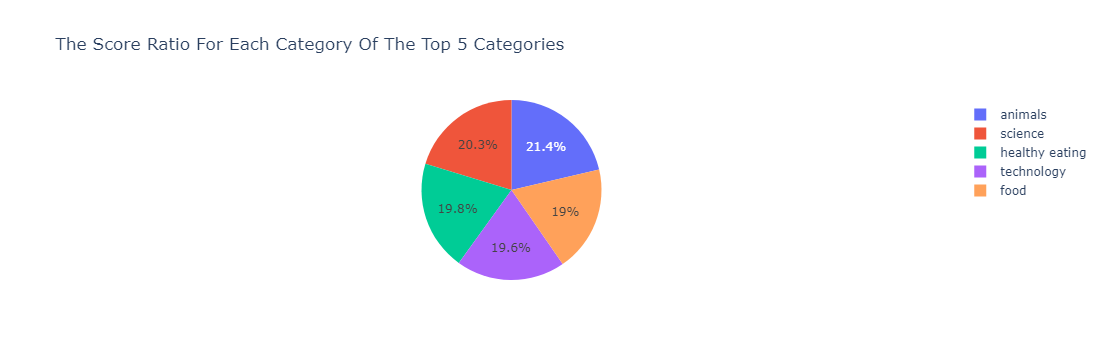

In [128]:
px.pie(data_frame=top5_df, values='Score', names='Category',
       title='The Score Ratio For Each Category Of The Top 5 Categories')

D:\anaconda\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



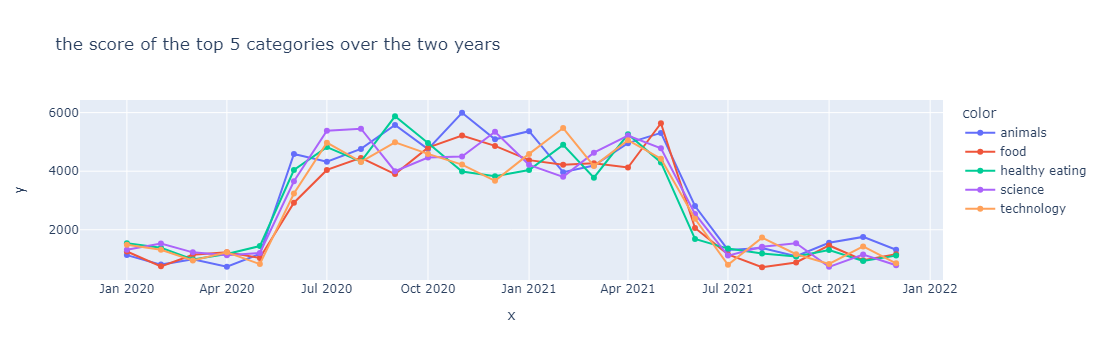

In [134]:
px.line(x=group_9['YearMonth'],y=group_9['Score'], color=group_9['Category'],markers=True,
       title='the score of the top 5 categories over the two years')

# All category scores increase and decrease at the same time

In [145]:


group_10 = df.groupby(['Category', 'Content Type']).agg({'Score':'sum'}).reset_index()
group_10 = group_10[group_10['Category'].isin(top5_df['Category'].values)] 
group_10

Category Content Type  Score
0          animals          GIF  12952
1          animals        audio  22748
2          animals        photo  27128
3          animals        video  12137
24            food          GIF  17750
25            food        audio  15276
26            food        photo  14643
27            food        video  19007
28  healthy eating          GIF  15308
29  healthy eating        audio  20712
30  healthy eating        photo  13476
31  healthy eating        video  19843
36         science          GIF  14049
37         science        audio  14966
38         science        photo  20607
39         science        video  21546
48      technology          GIF  19841
49      technology        audio  23160
50      technology        photo  16386
51      technology        video   9351

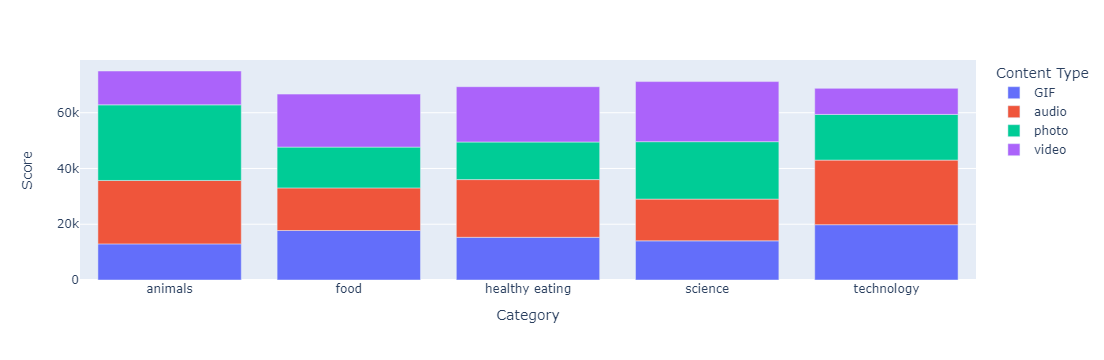

In [146]:
px.bar(data_frame=group_10, x='Category', y='Score',color='Content Type' )

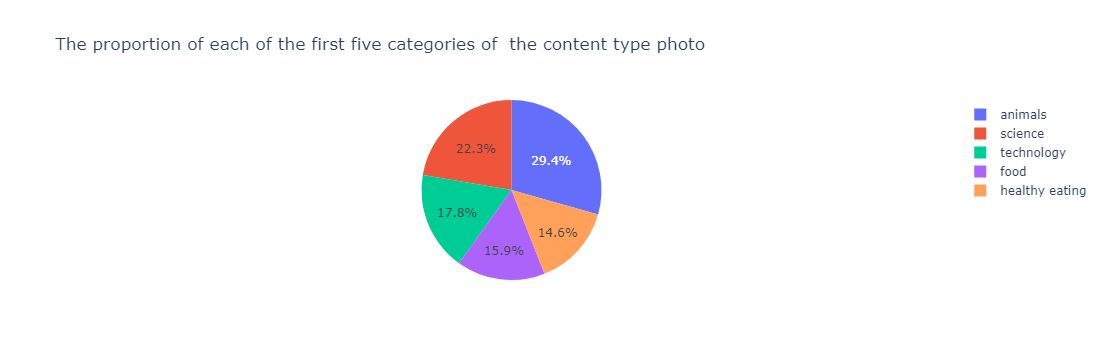

In [151]:
group_10[group_10['Content Type']=='photo']
px.pie(data_frame=group_10[group_10['Content Type']=='photo'],
       values='Score', names='Category',
      title='The proportion of each of the first five categories of  the content type photo')

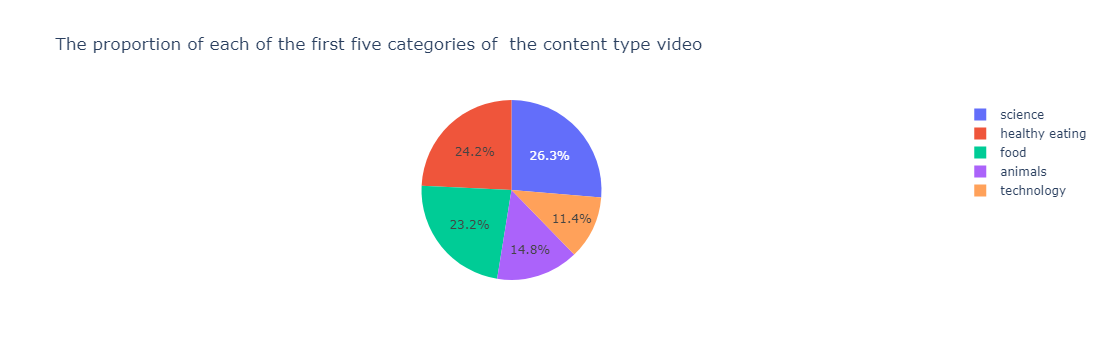

In [153]:
px.pie(data_frame=group_10[group_10['Content Type']=='video'],
       values='Score', names='Category',
      title='The proportion of each of the first five categories of  the content type video')

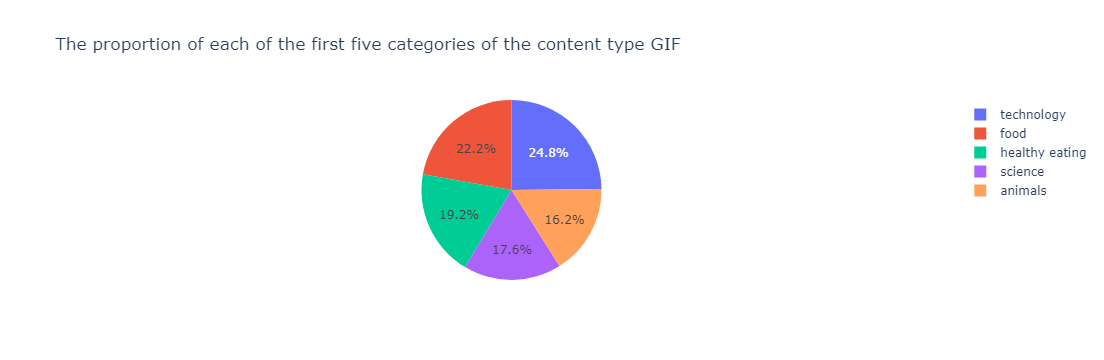

In [156]:
px.pie(data_frame=group_10[group_10['Content Type']=='GIF'],
       values='Score', names='Category',
      title='The proportion of each of the first five categories of the content type GIF')

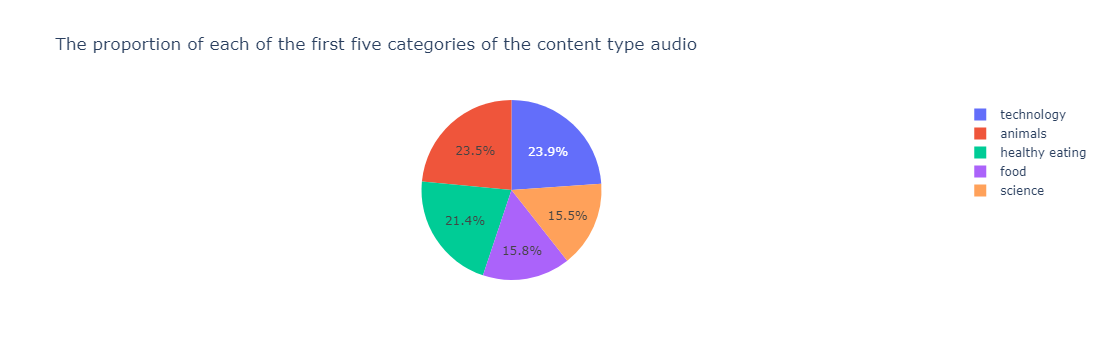

In [157]:
px.pie(data_frame=group_10[group_10['Content Type']=='audio'],
       values='Score', names='Category',
      title='The proportion of each of the first five categories of the content type audio')